## Contexte

Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.  

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).  

**Notes:**  
1.(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. 

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.  

**Attribute Information:**  
1.date: Date in format dd/mm/yyyy  
2.time: time in format hh:mm:ss  
3.globalactivepower: household global minute-averaged active power (in kilowatt)  
4.globalreactivepower: household global minute-averaged reactive power (in kilowatt)  
5.voltage: minute-averaged voltage (in volt)  
6.global_intensity: household global minute-averaged current intensity (in ampere)  
7.submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).  
8.submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.  
9.submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.  

### Import library

In [102]:
import pandas as pd
import numpy as np

#viz
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## EDA

In [103]:
# load all data
df = pd.read_csv('data/household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# summarize
print(df.shape)
print('---------------')
print(df.head())
print('---------------')
print(df.info())

(2075259, 7)
---------------
                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15

In [104]:
df.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [108]:
# mark all missing values
df.replace('?', 'NaN', inplace=True)

In [109]:
# add a column for for the remainder of sub metering
values = df.values.astype('float32')
df['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5])

In [110]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,69.266670
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,88.333336
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,87.566666
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,88.800003
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,60.099998


In [51]:
# save updated dataset
# #df.to_csv('household_power_consumption.csv')

In [58]:
# load the new file
data = pd.read_csv('data/household_power_consumption.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,69.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,88.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,87.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,88.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,60.100000


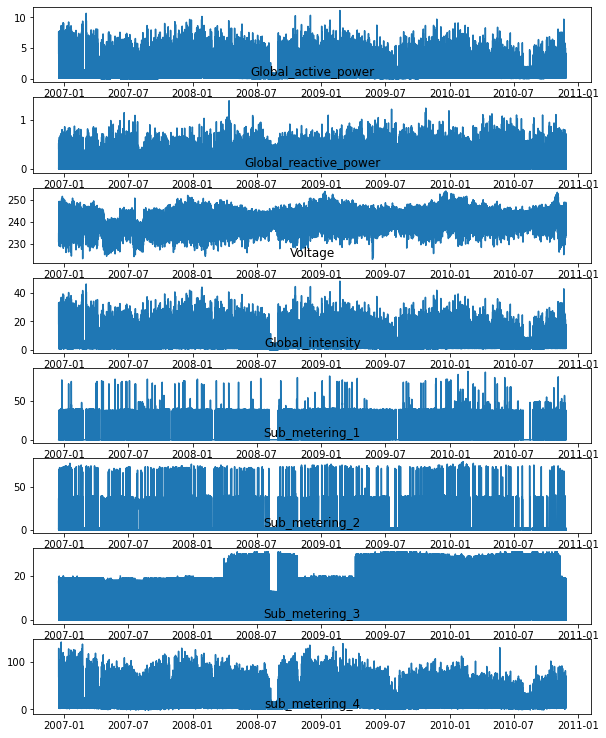

In [65]:
plt.figure(figsize=(10,13))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    plt.plot(data[name])
    plt.title(name, y=0)


plt.show()

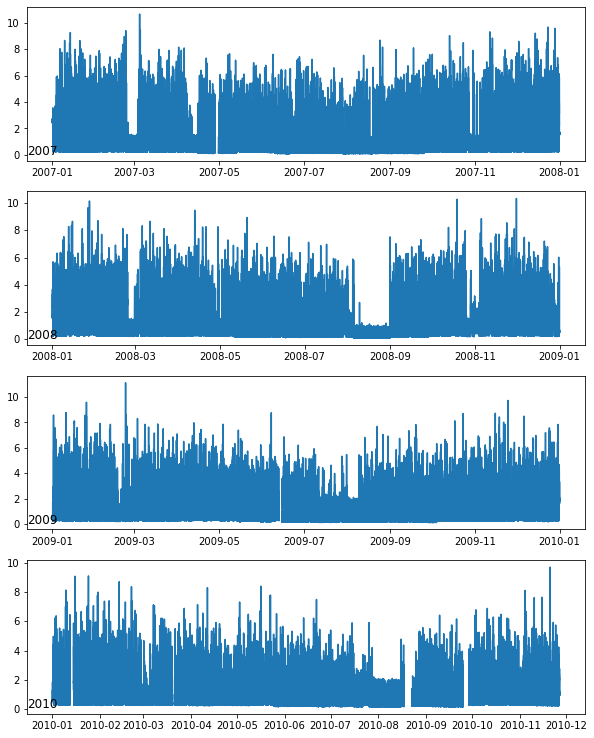

In [67]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10,13))

for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]
# get all observations for the year
    result = data[str(year)]
# plot the active power for the year
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(str(year), y=0, loc='left')


plt.show()

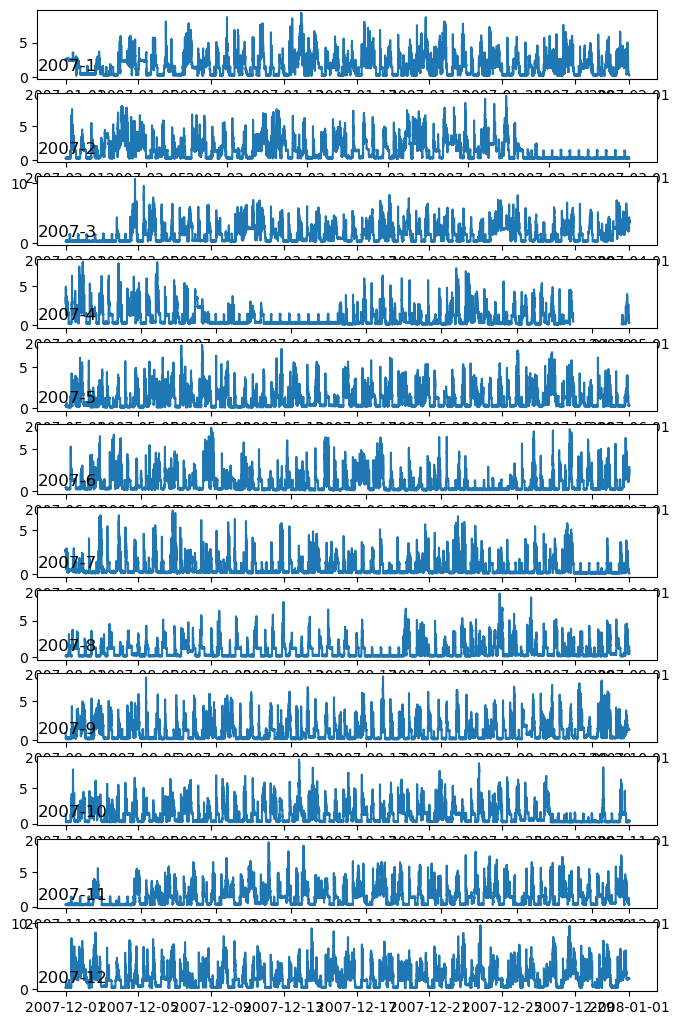

In [75]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(8,13), dpi=100)

for i in range(len(months)):
# prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
# determine the month to plot
    month = '2007-' + str(months[i])
# get all observations for the month
    result = data[month]
# plot the active power for the month
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(month, y=0, loc='left')


plt.show()

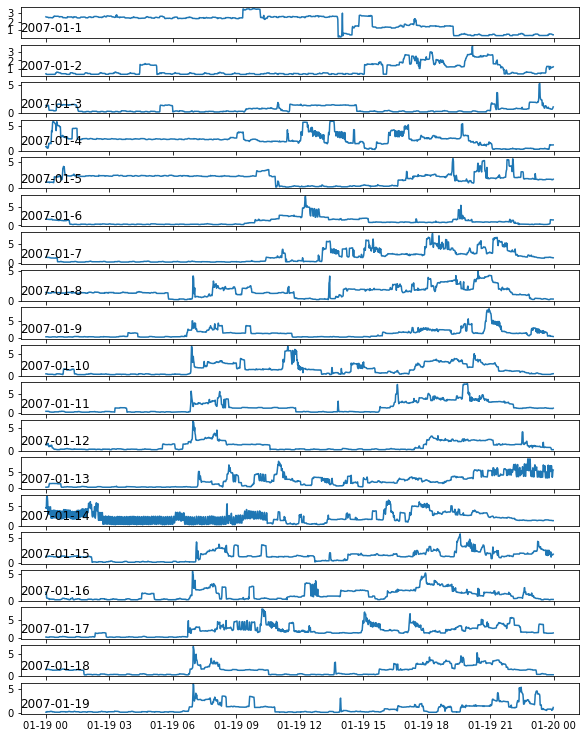

In [79]:
# plot active power for each year
days = [x for x in range(1, 20)]
plt.figure(figsize=(10,13))

for i in range(len(days)):
# prepare subplot
    ax = plt.subplot(len(days), 1, i+1)
# determine the day to plot
    day = '2007-01-' + str(days[i])
# get all observations for the day
    result = data[day]
# plot the active power for the day
    plt.plot(result['Global_active_power'])
# add a title to the subplot
    plt.title(day, y=0, loc='left')


plt.show()

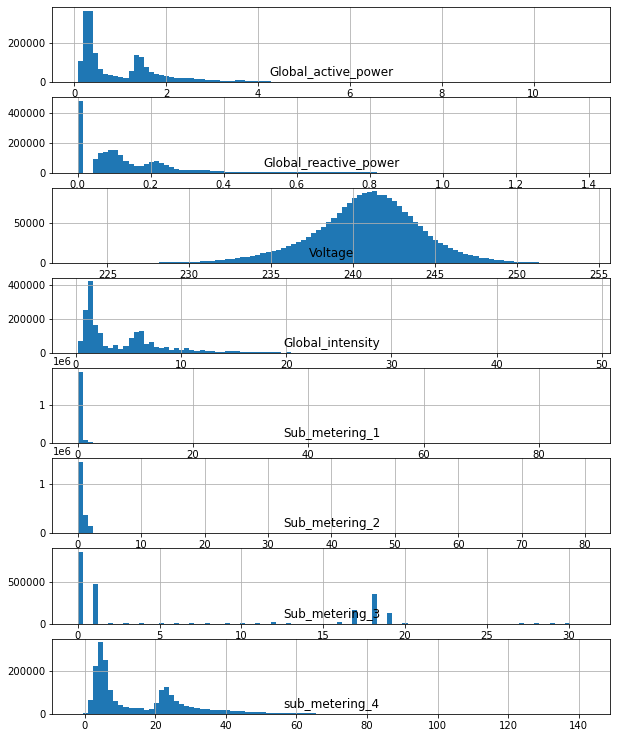

In [81]:
# histogram plot for each variable
plt.figure(figsize=(10,13))

for i in range(len(data.columns)):
    plt.subplot(len(data.columns), 1, i+1)
    name = data.columns[i]
    data[name].hist(bins=100)
    plt.title(name, y=0)


plt.show()

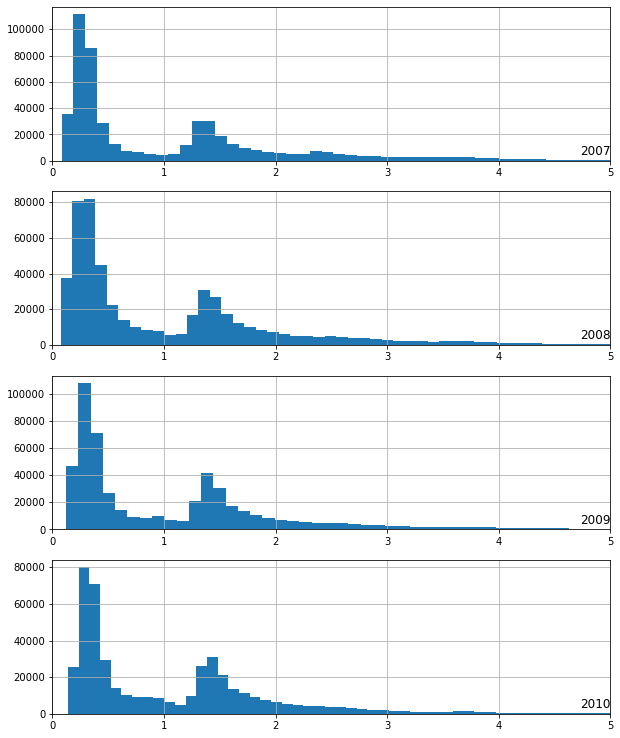

In [82]:
# plot active power for each year
years = ['2007', '2008', '2009', '2010']
plt.figure(figsize=(10,13))

for i in range(len(years)):
# prepare subplot
    ax = plt.subplot(len(years), 1, i+1)
# determine the year to plot
    year = years[i]
# get all observations for the year
    result = data[str(year)]
# plot the active power for the year
    result['Global_active_power'].hist(bins=100)
# zoom in on the distribution
    ax.set_xlim(0, 5)
# add a title to the subplot
    plt.title(str(year), y=0, loc='right')

plt.show()

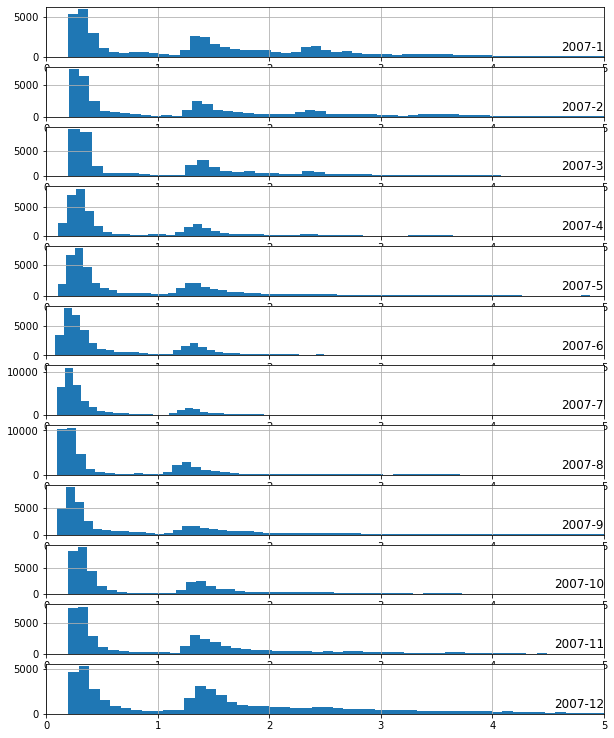

In [83]:
# plot active power for each year
months = [x for x in range(1, 13)]
plt.figure(figsize=(10,13))

for i in range(len(months)):
# prepare subplot
    ax = plt.subplot(len(months), 1, i+1)
# determine the month to plot
    month = '2007-' + str(months[i])
# get all observations for the month
    result = data[month]
# plot the active power for the month
    result['Global_active_power'].hist(bins=100)
# zoom in on the distribution
    ax.set_xlim(0, 5)
# add a title to the subplot
    plt.title(month, y=0, loc='right')


plt.show()